<a href="https://colab.research.google.com/github/aszapla/Curso-DL/blob/master/2_1_3_Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1.3. Ejercicio

En este ejercicio vamos a crear una Red Neuronal Convolucional para clasificar la base de datos llamada** Fashion MNIST**. 

En primer lugar descargaremos la base de datos y la prepararemos para el entrenamiento. Para practicar vamos a limitar el número de muestras de entrenamiento a 100, comprobaremos el resultado obtenido e intentarmeos solucionarlo de distintas formas. 

Por último entrenaremos usando todos los datos originales de la base de datos y crearemos un formulario para probar cómo funciona la red al clasificar una imagen externa, subida por nosotros. 

Sigue los pasos indicados y completa las líneas marcadas con "**TODO**".

## Paso 1. Descargar la base de datos

En primer lugar descargamos la base de datos y mostramos algunas imágenes escogidas aleatoriamente con su etiqueta o clase correspondiente.

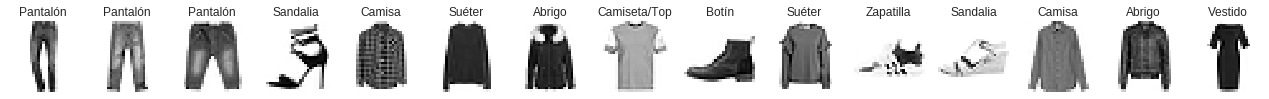

Datos para entrenamiento:
 - x_train: (60000, 28, 28)
 - y_train: (60000,)
Datos para evaluación:
 - x_test: (10000, 28, 28)
 - y_test: (10000,)


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import fashion_mnist
from tensorflow import set_random_seed

set_random_seed(1)  # Fijamos la semilla de TF
np.random.seed(1)  # Fijamos la semilla


# Descargamos la base de datos
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

labels = ['Camiseta/Top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso/a', 'Botín']


# Mostramos algunas imágenes
n = 15
index = np.random.randint(len(x_train), size=n)
plt.figure(figsize=(n*1.5, 1.5))
for i in np.arange(n):
    ax = plt.subplot(1,n,i+1)
    ax.set_title( labels[ y_train[ index[i] ] ] )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(x_train[index[i]])
plt.show()


# Mostramos la forma de los datos
print('Datos para entrenamiento:')
print(' - x_train: {}'.format(str(x_train.shape))) # TODO: Muestra la forma de la variable x_train
print(' - y_train: {}'.format(str(y_train.shape))) # TODO: Muestra la forma de la variable y_train
print('Datos para evaluación:')
print(' - x_test: {}'.format(str(x_test.shape)))   # TODO: Muestra la forma de la variable x_test
print(' - y_test: {}'.format(str(y_test.shape)))   # TODO: Muestra la forma de la variable y_test

## Paso 2. Preparar los datos para el entrenamiento

En este paso vamos a preparar los datos para el entrenamiento. Sobre las características (x_train y x_test) tendremos que realizar una redimensión para añadir el canal de gris, transformar los datos a decimal y normalizarlos entre 0 y 1. Y las etiquetas las tendremos que transformar a modo categórico. 

In [0]:
# ---------------------
def prepare_data(x):
  x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)    # Redimensionamos para añadir el canal
  x = x_train.astype(np.float32)# TODO: Transforma la variable "x" a decimal
  x /= 255 # TODO: Normaliza la variable "x" entre 0 y 1
  return x

x_train = prepare_data(x_train)
x_test  = prepare_data(x_test)


# Transformamos las etiquetas a categórico (one-hot)
NUM_LABELS = 10
y_train = keras.utils.to_categorical(y_train, NUM_LABELS) # TODO: Transforma la variable "y_train" a categórica
y_test = keras.utils.to_categorical(y_test, NUM_LABELS) # TODO: Transforma la variable "y_test" a categórica


# Para los primeros ejemplos vamos a limitar el número de imágenes de 
# entrenamiento a 100. Además nos guardamos un backup con todas las imágenes. 
x_train_backup = x_train
y_train_backup = y_train 
x_train = x_train[:100]
y_train = y_train[:100]


# Mostramos (de nuevo) las dimensiones de los datos
print('Datos para entrenamiento:')
print(' - x_train: {}'.format( x_train.shape ))
print(' - y_train: {}'.format( y_train.shape ))
print('Datos para evaluación:')
print(' - x_test: {}'.format( x_test.shape ))
print(' - y_test: {}'.format( y_test.shape ))

Datos para entrenamiento:
 - x_train: (100, 28, 28)
 - y_train: (100, 10)
Datos para evaluación:
 - x_test: (60000, 28, 28)
 - y_test: (10000, 10)


## Paso 3. Construimos la red y la entrenamos

En este tercer paso vamos a construir una red CNN básica y entrenarla. La red estará formada solamente por dos capas convolucionales (con 2 filtros de tamaño 3x3 cada una) seguida por una operación de Max Pooling (de tamaño 2x2), y por último una capa Fully Connected para la salida con 10 neuronas con activación tipo SoftMax.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model1 = Sequential() # TODO: Define un modelo secuencial

# Capa convolucional con 2 filtros de tamaño 3x3 seguida de un MaxPooling de 2x2
model1.add(Conv2D(2, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model1.add(MaxPooling2D(pool_size=(2, 2))  # TODO: Añade la capa de MaxPooling2D con la configuración indicada

# Capa convolucional con 2 filtros de tamaño 3x3 seguida de un MaxPooling de 2x2
model1.add(Conv2D(2, (3, 3), activation='relu')) # TODO: Añade la capa convolucional con la configuración indicada
model1.add(MaxPooling2D(pool_size=(2, 2)))  # TODO: Añade la capa de MaxPooling2D con la configuración indicada

# Capa Fully Connected
model1.add(Flatten())
model1.add(Dense(NUM_LABELS, activation='softmax'))  # TODO: Añade una capa densa con "NUM_LABELS" neuronas de salida y función de activación SoftMax

print(model.summary())       # TODO: Imprime el resumen con la configuración de la red


# Compilamos la red
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

# Entrenamos durante 10 épocas con un batch de 32
history = model1.fit(x_train, y_train, 
                     validation_data=(x_test, y_test),
                     batch_size=32, epochs=10, verbose=1)


SyntaxError: ignored

A continuación vamos a mostrar las curvas de aprendizaje y a evaluar el modelo entrenado con los datos de test.

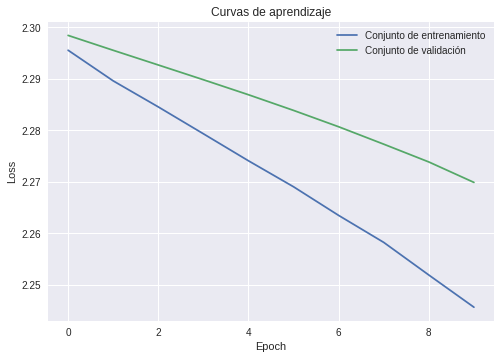

Resultado en el test set:
Test loss: 2.2699
Test accuracy: 12.10%


In [0]:
# -----------------------------
def plot_learning_curves(hist):
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Curvas de aprendizaje')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')  
  plt.legend(['Conjunto de entrenamiento', 'Conjunto de validación'], loc='upper right')
  plt.show()
  
plot_learning_curves(history)

# Evaluamos usando el test set
score =    # TODO: Llama a la función de evaluación del modelo entrenado con los datos x_test y y_test

print('Resultado en el test set:')
print('Test loss: {:0.4f}'.format(score[0]))
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

Como se puede ver en los resultados anteriores, parece que el modelo está haciendo overfitting: la varianza, diferencia entre el error de entrenamiento y el de validación, es muy alta. Esto también se puede ver en el accuracy obtenido, 22% para el conjunto de entrenamiento y 12% para la validación. 

## Paso 4. Construimos un nuevo modelo de red

Como el resultado obtenido con el modelo anterior no es muy bueno y además parece que está haciendo overfitting, vamos a crear otro modelo de red con más filtros por cada capa convolucional (32), y además le añadiremos un 20% de dropout. 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
__________

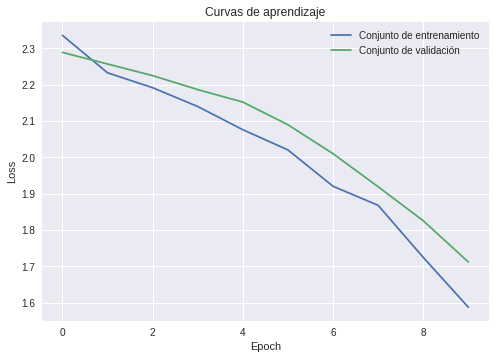

Resultado en el test set:
Test loss: 1.7117
Test accuracy: 48.41%


In [0]:
from keras.layers import Dropout

model2 = Sequential()

# Capa convolucional con 32 filtros de tamaño 3x3 seguida de un MaxPooling de 2x2
model2.add(Conv2D(  , (3, 3), activation='relu', input_shape=x_train.shape[1:]))   # TODO: Establece el número de filtros a 32
model2.add(  )   # TODO: Añade la capa de MaxPooling2D con la configuración indicada
model2.add(  )   # TODO: Añade un Dropout de 0.2

# Capa convolucional con 32 filtros de tamaño 3x3 seguida de un MaxPooling de 2x2
model2.add(Conv2D(  , (3, 3), activation='relu'))   # TODO: Establece el número de filtros a 32
model2.add(  )   # TODO: Añade la capa de MaxPooling2D con la configuración indicada
model2.add(  )   # TODO: Añade un Dropout de 0.2

# Capa Fully Connected
model2.add(  )  # TODO: Añade una capa tipo Flatten
model2.add(Dense(NUM_LABELS, activation='softmax'))

print(model2.summary())

# Compilamos y entrenamos
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
history = model2.fit(x_train, y_train, validation_data=(x_test, y_test),
                    batch_size=32, epochs=10, verbose=1)

 
plot_learning_curves(history)

# Evaluamos usando el test set
score = model2.evaluate(x_test, y_test, verbose=0)

print('Resultado en el test set:')
print('Test loss: {:0.4f}'.format(score[0]))
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))


Con esta nueva topología de red hemos conseguido mejorar el resultado, además la varianza obtenida es mucho más baja (ya no está haciendo overfitting). Sin embargo, el error de entrenamiento (el bias) sigue siendo bastante alto. 

Para solucionar esto podríamos aplicar aumentado de datos (este ejercicio se deja como opcional) o añadir más datos al conjunto de entrenamiento. Como inicialmente habíamos limitado los datos vamos a usar la segunda estrategia. 

## Paso 5. Entrenar con todas las imágenes

En este paso vamos a restaurar todas las imágenes de entrenamiento que nos habíamos guardado al principio en las variables `x_train_backup` y `y_train_backup`, y volveremos a lanzar el entrenamiento para el segundo modelo de red que hemos creado. 

Datos para entrenamiento:
 - x_train: (60000, 28, 28, 1)
 - y_train: (60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.5524 - acc: 0.7973 - val_loss: 0.4076 - val_acc: 0.8583
Epoch 2/10
17920/60000 [=======>......................] - ETA: 11s - loss: 0.4197 - acc: 0.8479

60000/60000 [==============================] - 17s 278us/step - loss: 0.4005 - acc: 0.8555 - val_loss: 0.3688 - val_acc: 0.8670
Epoch 3/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.3626 - acc: 0.8697 - val_loss: 0.3412 - val_acc: 0.8799
Epoch 4/10
 8768/60000 [===>..........................] - ETA: 13s - loss: 0.3327 - acc: 0.8776

60000/60000 [==============================] - 17s 279us/step - loss: 0.3352 - acc: 0.8782 - val_loss: 0.3213 - val_acc: 0.8859
Epoch 5/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.3173 - acc: 0.8846 - val_loss: 0.3134 - val_acc: 0.8874
Epoch 6/10
 6176/60000 [==>...........................] - ETA: 14s - loss: 0.3066 - acc: 0.8912

60000/60000 [==============================] - 17s 282us/step - loss: 0.3040 - acc: 0.8884 - val_loss: 0.2992 - val_acc: 0.8918
Epoch 7/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.2960 - acc: 0.8921 - val_loss: 0.2895 - val_acc: 0.8946
Epoch 8/10
 5440/60000 [=>............................] - ETA: 14s - loss: 0.2947 - acc: 0.8928

60000/60000 [==============================] - 17s 282us/step - loss: 0.2879 - acc: 0.8942 - val_loss: 0.2883 - val_acc: 0.8970
Epoch 9/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.2810 - acc: 0.8966 - val_loss: 0.2838 - val_acc: 0.8958
Epoch 10/10
 5664/60000 [=>............................] - ETA: 14s - loss: 0.2765 - acc: 0.8971

60000/60000 [==============================] - 17s 278us/step - loss: 0.2742 - acc: 0.8983 - val_loss: 0.2782 - val_acc: 0.8997


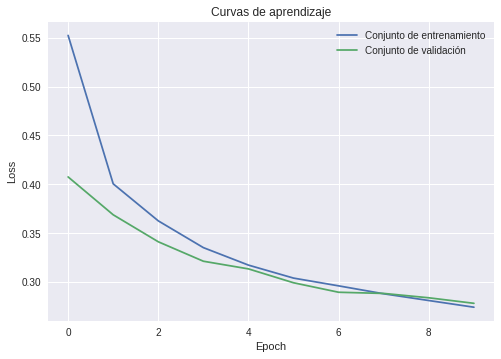

Resultado en el test set:
Test loss: 0.2782
Test accuracy: 89.97%


In [0]:
# Restauramos todas las imágenes de entrenamiento
x_train = x_train_backup
y_train = y_train_backup

print('Datos para entrenamiento:')
print(' - x_train: {}'.format( x_train.shape ))
print(' - y_train: {}'.format( y_train.shape ))


# Iniciamos el entrenamiento
history = model2.fit(x_train, y_train, validation_data=(x_test, y_test),
                     batch_size=  ,  # TODO: Establece el tamaño de batch a 32
                     epochs=  ,      # TODO: Establece el número de épocas a 10
                     verbose=1)

plot_learning_curves(  )   # TODO: Pasa como parámetro a la función la variable que almacena las curvas de aprendizaje


# Evaluamos usando el test set
score = model2.evaluate(x_test, y_test, verbose=0)

print('Resultado en el test set:')
print('Test loss: {:0.4f}'.format(score[0]))
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

Como se puede ver, al entrenar con muchos más datos el resultado obtenido ha mejorado hasta alcanzar el 90% de acierto. 

## Paso 6. Predicción con imágenes externas

Por último vamos a probar el funcionamiento del segundo modelo entrenado para la predicción de la clase de imágenes externas, subidas por nosotros mediante un formulario. 

Saving pantalón.jpg to pantalón (9).jpg
Saving pantalón2.jpg to pantalón2 (3).jpg
Saving zapato.jpg to zapato (3).jpg
Saving pantalon_gray.jpg to pantalon_gray (6).jpg
Saving pantalon.jpg to pantalon (8).jpg
Saving camiseta.jpg to camiseta (4).jpg


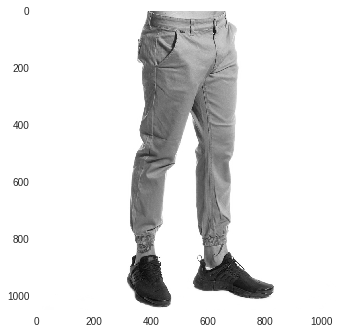

Predicción:  Pantalón


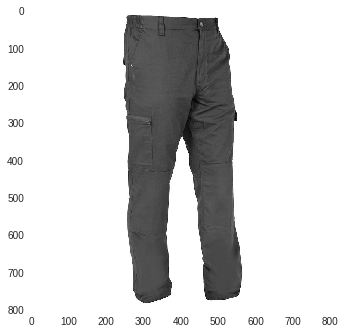

Predicción:  Pantalón


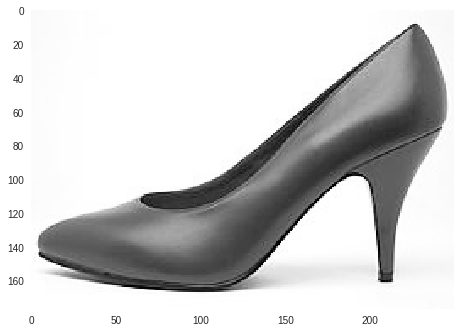

Predicción:  Botín


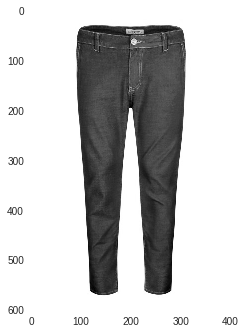

Predicción:  Pantalón


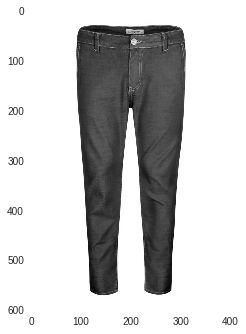

Predicción:  Pantalón


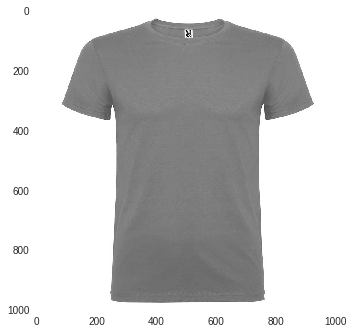

Predicción:  Camiseta/Top


In [0]:
from google.colab import files
from io import BytesIO
import cv2

uploaded = files.upload()

for fn in uploaded.keys():
  img = cv2.imread(fn, cv2.IMREAD_COLOR) 
  img = 255 - cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)   
  
  plt.imshow(img)
  plt.grid(False)
  plt.show()
  
  # Escalamos la imagen
  img = cv2.resize(img, (28, 28)) 
  
  # Normalizamos los datos
  img = prepare_data(np.array([img]))
    
  # Ejecutamos la red
  prediction = model2.   # TODO: Llama a la función para calcular la predicción a partir de la variable de entrada "img"
  
  print('Predicción: ', labels[np.argmax(prediction)])

